In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Step-by-Step Guide: Predicting the Beats-per-Minute of Songs
Welcome to the Kaggle Playground Series S5E9! This notebook will guide you through the process of building a model to predict the beats-per-minute (BPM) of songs.

## Steps
1. **Understand the Problem**  
   - Review the competition goal and data format.
2. **Import Libraries & Load Data**  
   - Import necessary Python libraries.
   - Load the training and test datasets.
3. **Explore the Data (EDA)**  
   - Inspect the data structure, check for missing values, and visualize distributions.
4. **Preprocess the Data**  
   - Handle missing values, encode categorical variables, and scale features if needed.
5. **Build a Baseline Model**  
   - Train a simple regression model (e.g., Linear Regression, Random Forest, or XGBoost).
6. **Evaluate the Model**  
   - Use cross-validation or a validation split to assess performance.
7. **Feature Engineering & Model Improvement**  
   - Try new features, different models, or hyperparameter tuning to improve results.
8. **Make Predictions on Test Data**  
   - Generate predictions for the test set.
9. **Prepare Submission**  
   - Format predictions according to `sample_submission.csv` and save for submission.
10. **Submit to Kaggle**  
   - Upload your submission and review your score.

Let's get started!

## 1. Import Libraries & Load Data
Let's import the necessary libraries and load the training, test, and sample submission datasets.

In [4]:
# Import libraries
import numpy as np
import pandas as pd

# Load datasets
train = pd.read_csv('kaggle/input/train.csv')
test = pd.read_csv('kaggle/input/test.csv')
sample_submission = pd.read_csv('kaggle/input/sample_submission.csv')

# Show the shape of the datasets
print('Train shape:', train.shape)
print('Test shape:', test.shape)
print('Sample submission shape:', sample_submission.shape)

# Display the first few rows of the training data
train.head()

Train shape: (524164, 11)
Test shape: (174722, 10)
Sample submission shape: (174722, 2)


,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
0,0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


## 2. Explore the Data (EDA)
Let's start exploring the data. We'll begin by checking the structure, types, and summary statistics of the training set.

### 2.1. Data Structure and Types
Let's check the columns, data types, and missing values in the training data.

In [5]:
# Show columns and data types
print(train.dtypes)

# Check for missing values
print('\nMissing values per column:')
print(train.isnull().sum())

id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object

Missing values per column:
id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64


### 2.2. Summary Statistics
Now, let's look at summary statistics for the numeric features in the training data.

In [6]:
# Summary statistics for numeric columns
train.describe()

,id,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,262081.500000,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,151313.257587,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.000000,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,131040.750000,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,262081.500000,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,393122.250000,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,524163.000000,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


### 2.3. Target Variable Distribution
Let's visualize the distribution of the target variable (BPM) to understand its range and shape.

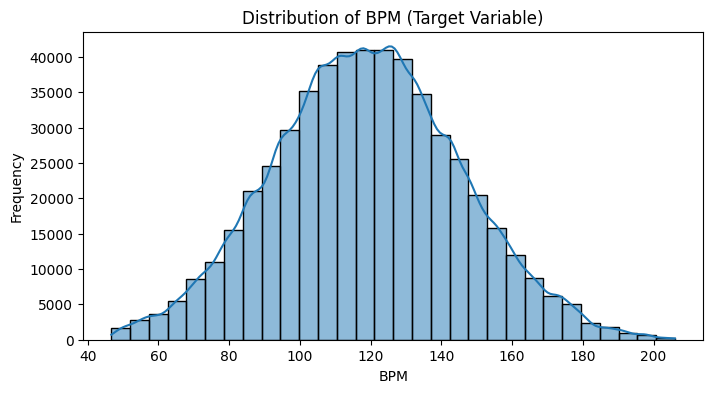

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable (assuming 'BeatsPerMinute' is the target column)
plt.figure(figsize=(8, 4))
sns.histplot(train['BeatsPerMinute'], kde=True, bins=30)
plt.title('Distribution of BPM (Target Variable)')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

### 2.4. Feature Distributions and Relationships
Let's visualize the distributions of some features and their relationships with the target variable (BPM).

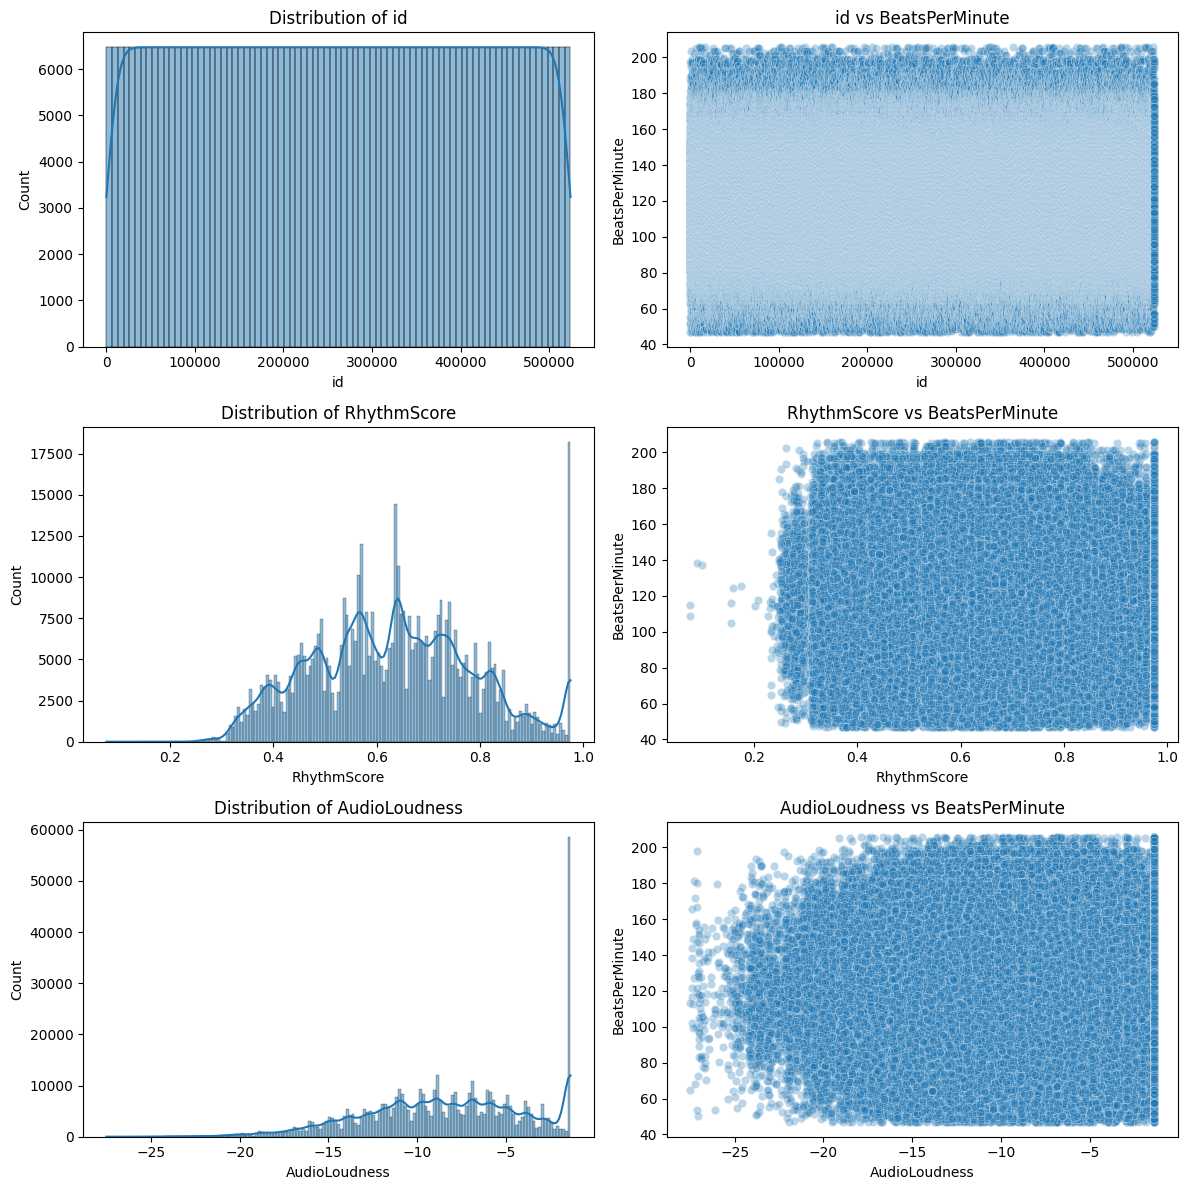

In [9]:
# Plot distributions for a few numeric features and their relationship with BPM
numeric_features = train.select_dtypes(include=[np.number]).columns.tolist()
numeric_features = [f for f in numeric_features if f != 'BeatsPerMinute']  # Exclude target
sample_features = numeric_features[:3]  # Plot first 3 features as example

fig, axes = plt.subplots(len(sample_features), 2, figsize=(12, 4 * len(sample_features)))
for i, feature in enumerate(sample_features):
    # Distribution
    sns.histplot(train[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {feature}')
    # Relationship with BeatsPerMinute
    sns.scatterplot(x=train[feature], y=train['BeatsPerMinute'], ax=axes[i, 1], alpha=0.3)
    axes[i, 1].set_title(f'{feature} vs BeatsPerMinute')
plt.tight_layout()
plt.show()

## 3. Preprocess the Data
Let's prepare the data for modeling. We'll start by handling missing values, then encode categorical variables, and finally scale features if needed.

### 3.1. Handle Missing Values
First, let's check again for missing values and decide how to handle them. We'll fill or drop missing values as appropriate.

In [10]:
# Handle missing values (example: fill numeric with median, categorical with mode)
for col in train.columns:
    if train[col].isnull().sum() > 0:
        if train[col].dtype == 'object':
            mode = train[col].mode()[0]
            train[col].fillna(mode, inplace=True)
            test[col].fillna(mode, inplace=True)
        else:
            median = train[col].median()
            train[col].fillna(median, inplace=True)
            test[col].fillna(median, inplace=True)

### 3.2. Encode Categorical Variables
Next, we'll convert any categorical features into numeric format using one-hot encoding.

In [11]:
# One-hot encode categorical variables
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
train_encoded = pd.get_dummies(train, columns=categorical_cols)
test_encoded = pd.get_dummies(test, columns=categorical_cols)

# Align train and test dataframes to have the same columns
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

### 3.3. Feature Scaling (Optional)
For some models, scaling features can improve performance. We'll use StandardScaler as an example.

In [14]:
from sklearn.preprocessing import StandardScaler

# Identify feature columns (exclude target and any ID columns)
target_col = 'BeatsPerMinute'  # Update if your target column is named differently
feature_cols = [col for col in train_encoded.columns if col != target_col]

scaler = StandardScaler()
train_encoded[feature_cols] = scaler.fit_transform(train_encoded[feature_cols])
test_encoded[feature_cols] = scaler.transform(test_encoded[feature_cols])

## 4. Build a Baseline Model
Let's train a simple regression model as a baseline. We'll use a Random Forest Regressor and evaluate its performance using cross-validation.

**Update:** The Random Forest model was taking too long to run. We'll now use fewer trees (`n_estimators=10`) and fewer cross-validation folds (`cv=3`) for much faster testing.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Split features and target
X = train_encoded[feature_cols]
y = train_encoded[target_col]

# Faster Random Forest for testing
rf = RandomForestRegressor(n_estimators=10, random_state=42)

# Faster cross-validation
scores = cross_val_score(rf, X, y, cv=3, scoring='neg_root_mean_squared_error')
print('Cross-validated RMSE (fast version):', -scores.mean())

Cross-validated RMSE (fast version): 28.27150588468898
